In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [55]:
df = pd.read_csv('./crypto-markets.csv',index_col = 'date',parse_dates=True)
df.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [56]:
Bitcoin = df[df['name']=='Bitcoin']

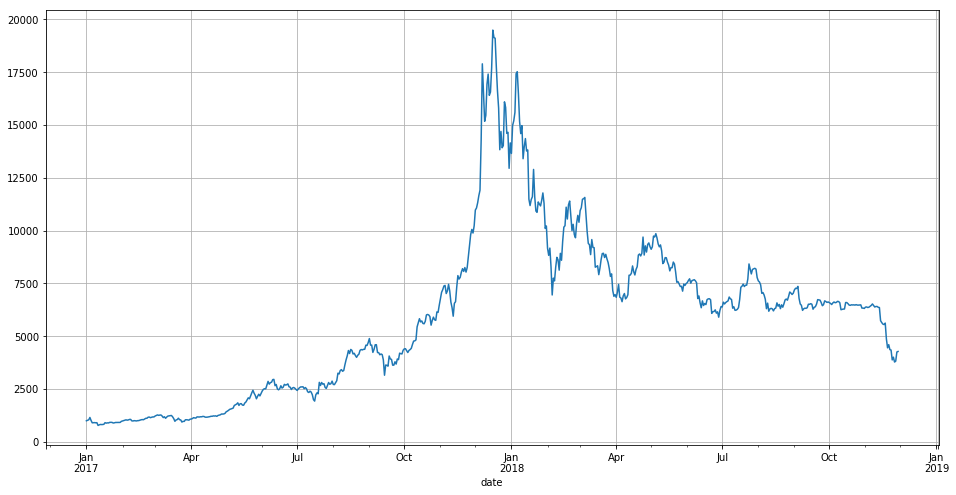

In [81]:
Bitcoin['close'].plot(figsize=(16,8), grid=True)

In [72]:
data = df.loc['2018-11':'2018-12']
data[data['ranknow'] <= 10].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2              [XRP]
3         [Ethereum]
4          [Stellar]
5     [Bitcoin Cash]
6              [EOS]
7         [Litecoin]
8           [Tether]
9       [Bitcoin SV]
10         [Cardano]
Name: name, dtype: object

In [205]:
Bitcoin = df[df['name']=='Bitcoin'].loc['2017':]
XRP = df[df['name']=='XRP'].loc['2017':]
Ethereum = df[df['name']=='Ethereum'].loc['2017':]
Stellar = df[df['name']=='Stellar'].loc['2017':]
Bitcoin_Cash = df[df['name']=='Bitcoin Cash'].loc['2017':]

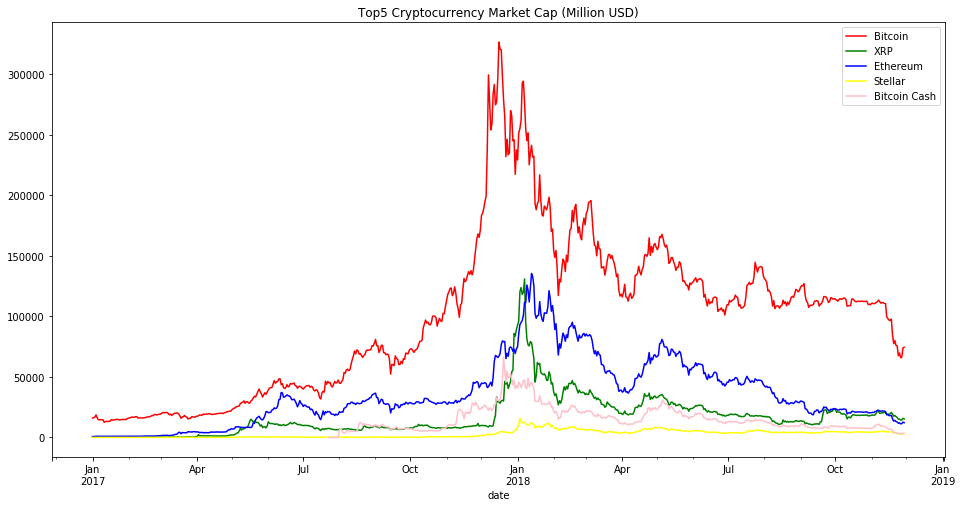

In [77]:
plt.figure(figsize=(16,8))
(Bitcoin['market']/1000000).plot(color='red', label='Bitcoin')
(XRP['market']/1000000).plot(color='green', label='XRP')
(Ethereum['market']/1000000).plot(color='blue', label='Ethereum')
(Stellar['market']/1000000).plot(color='yellow', label='Stellar')
(Bitcoin_Cash['market']/1000000).plot(color='pink', label='Bitcoin Cash')
plt.legend()
plt.title('Top5 Cryptocurrency Market Cap (Million USD)')
plt.show()

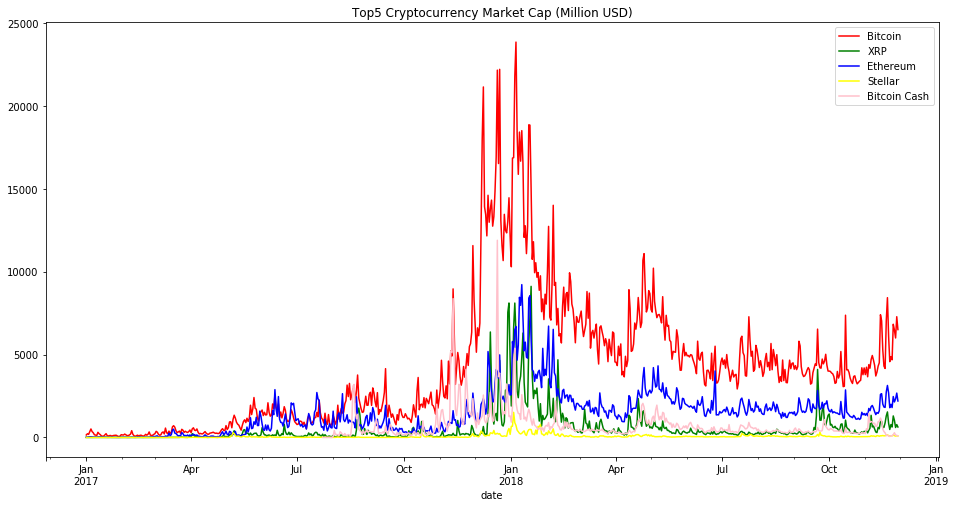

In [78]:
plt.figure(figsize=(16,8))
(Bitcoin['volume']/1000000).plot(color='red', label='Bitcoin')
(XRP['volume']/1000000).plot(color='green', label='XRP')
(Ethereum['volume']/1000000).plot(color='blue', label='Ethereum')
(Stellar['volume']/1000000).plot(color='yellow', label='Stellar')
(Bitcoin_Cash['volume']/1000000).plot(color='pink', label='Bitcoin Cash')
plt.legend()
plt.title('Top5 Cryptocurrency Market Cap (Million USD)')
plt.show()

In [96]:
btc = Bitcoin[['close']]
btc.columns = ['BTC']

xrp = XRP[['close']]
xrp.columns = ['XRP']

eth = Ethereum[['close']]
eth.columns = ['ETH']

xlm = Stellar[['close']]
xlm.columns = ['XLM']

bch = Bitcoin_Cash[['close']]
bch.columns = ['BCH']

close = pd.concat([btc,xrp,eth,xlm,bch], axis=1, join='inner')

In [98]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495 entries, 2017-07-23 to 2018-11-29
Freq: D
Data columns (total 5 columns):
BTC    495 non-null float64
XRP    495 non-null float64
ETH    495 non-null float64
XLM    495 non-null float64
BCH    495 non-null float64
dtypes: float64(5)
memory usage: 23.2 KB


In [111]:
close.index.values[0]

numpy.datetime64('2017-07-23T00:00:00.000000000')

In [119]:
close.index.values[len(close)-1]

numpy.datetime64('2018-11-29T00:00:00.000000000')

In [173]:
coins_get = (5000/close.iloc[0]).round(3)
coins_get

BTC         1.831
XRP     25633.401
ETH        22.129
XLM    229684.414
BCH        12.105
Name: 2017-07-23 00:00:00, dtype: float64

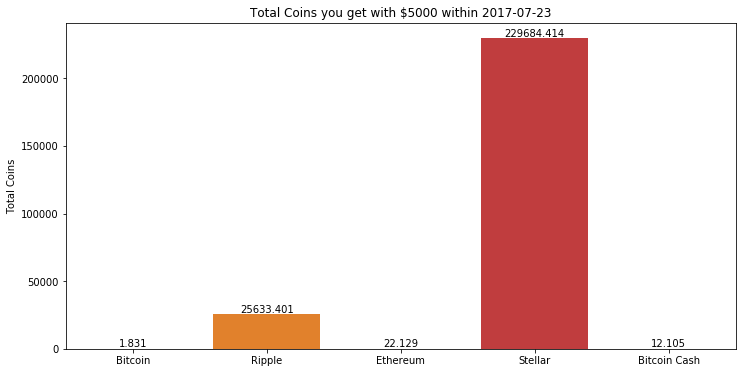

In [187]:
f = plt.figure(figsize=(12,6))
ax = sns.barplot(['Bitcoin','Ripple','Ethereum','Stellar','Bitcoin Cash'],coins_get.values)
plt.title('Total Coins you get with $5000 within 2017-07-23')
plt.ylabel('Total Coins')
rects = ax.patches
labels = coins_get.values
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), label, ha='center', va='bottom')
plt.show()

In [183]:
value_earn = coins_get * close.tail(1)
value_earn = value_earn.stack()
value_earn.index = value_earn.index.droplevel(0)

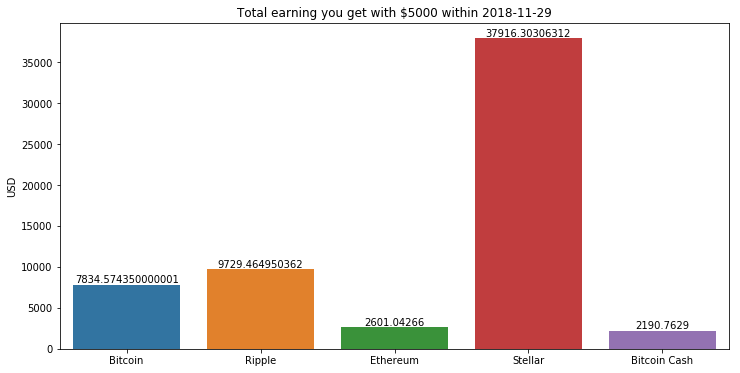

In [186]:
f = plt.figure(figsize=(12,6))
ax = sns.barplot(['Bitcoin','Ripple','Ethereum','Stellar','Bitcoin Cash'], value_earn)
plt.title('Total earning you get with $5000 within 2018-11-29')
plt.ylabel('USD')
rects = ax.patches
labels = value_earn.values
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), label, ha='center', va='bottom')
plt.show()

In [206]:
Bitcoin.drop(['slug','volume','symbol','name','ranknow','market','close_ratio','spread'],axis=1,inplace=True)
Bitcoin.dropna(inplace=True)

In [207]:
from sklearn.model_selection import train_test_split
X = Bitcoin[['open','high','low']]
y = Bitcoin['close']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=101)

In [211]:
X_test = X_test.sort_index()
y_test = y_test.sort_index()

In [212]:
from sklearn.preprocessing import PolynomialFeatures

In [213]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.fit_transform(X_test)
# create model
poly_model = LinearRegression()
# train model
poly_model.fit(X_train_poly, y_train)
# predict model
y_predict_poly = poly_model.predict(X_test_poly)
poly_model.intercept_

NameError: name 'poly' is not defined